## Stroke Prediction Dataset EDA Project 
Dataset Reference: <br>
fedesoriano. 2021-01-26. Stroke Prediction Dataset, Version 1. Retrieved 2021-05-20 from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

Stroke is the 5th leading cause of death and disability in the United States according to the American Heart Association.  Every 40 seconds in the US, someone experiences a stroke and every 4 minutes, someone dies from it according to the CDC. A recent figure of stroke-related cost almost reached $46 billion.  Through this project, we will explore which factors are the leading drivers for stroke to bring awareness to individuals and lay the basic analysis for future work in building a predictive model using Machine Learning which could be benefitial to hospitals and insurance companies in estimating risk and pricing.

***Attribute Information
1) id: unique identifier <br> 
2) gender: "Male", "Female" or "Other"<br> 
3) age: age of the patient<br> 
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br> 
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br> 
6) ever_married: "No" or "Yes"<br> 
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br> 
8) Residence_type: "Rural" or "Urban"<br> 
9) avg_glucose_level: average glucose level in blood<br> 
10) bmi: body mass index<br> 
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br> 
12) stroke: 1 if the patient had a stroke or 0 if not<br> 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [435]:
import math 
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score

### Data cleaning and preprocessing

In [436]:
df = pd.read_csv('stroke_prediction_data.csv')
df.head(10) # let's look at the top 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
6,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
7,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
8,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
9,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0


In [437]:
df.tail(10) # let's look at the bottom 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,NaN,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [438]:
df.shape  #5110 rows and 12 attributes 

(5110, 12)

In [439]:
df.info() #datatypes are numeric and object (categorical) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Let's find out the stroke percentage of the record:

In [440]:
df[['age', 'avg_glucose_level', 'bmi']].describe() # basic stat figures of the numeric fields

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [441]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

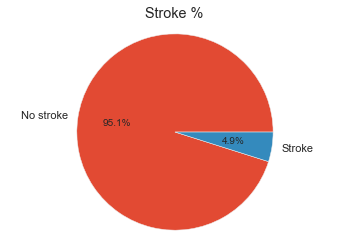

In [442]:
df_stroke = df['stroke'].value_counts()
my_labels = 'No stroke', 'Stroke'
plt.pie(df_stroke, labels = my_labels, autopct= '%1.1f%%')
plt.title('Stroke %')
plt.axis('equal')
plt.show()

In [443]:
 #Let's find out if there are any null values:  
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is only 4.9%:

In [444]:
len(df[df['bmi'].isna() & df['stroke']==1]) 

40

There are 40 stroke patients among the null BMI values making up 16% of total strokes! so we will NOT remove them and instead will fill in the mean BMI value in order to keep all the stroke counts - for modeling purposes:

In [445]:
bmi_mean = df['bmi'].mean()
bmi_mean = np.round(bmi_mean, 1)
bmi_mean

28.9

In [446]:
# df['bmi'].fillna(bmi_mean, inplace = True) 
# df.tail(10)

In [447]:
#Let's ensure that there is no null value left in BMI field:
df['bmi'].isna().sum()

201

Let's explore the column fields more to learn about what kind of different values the CATEGORICAL fields have:

In [448]:
df['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [449]:
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1327,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is 1 'Other' record in the Gender field that we can remove since the size is insignificant: 

In [450]:
df = df[df['gender'] != 'Other']
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Let's drop the id field since we will not be using it for analysis: 

In [451]:
df = df.drop(columns=['id'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [452]:
df['hypertension'].value_counts() 

0    4611
1     498
Name: hypertension, dtype: int64

In [453]:
# % of people with hypertension 
len(df[df['hypertension']== 1])/len(df)*100

9.747504403992954

In [454]:
df['heart_disease'].value_counts() 

0    4833
1     276
Name: heart_disease, dtype: int64

In [455]:
# % of people with heart disease 
len(df[df['heart_disease']== 1])/len(df)*100

5.40223135642983

In [456]:
df['ever_married'].value_counts() 

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [457]:
# % of people who have been married 
len(df[df['ever_married']== 'Yes'])/len(df)*100

65.629281659816

In [458]:
df['work_type'].value_counts() 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [459]:
df['Residence_type'].value_counts() 

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [460]:
# % of people who reside in Urban setting 
len(df[df['Residence_type']== 'Urban'])/len(df)*100

50.81229203366608

In [461]:
df['smoking_status'].value_counts() 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [462]:
len(df[df['smoking_status']== 'Unknown'])/len(df)

0.30221178312781366

Since the 'Unknown' category within the 'smoking_status' field makes up 30.2% of the records, we will leave it alone.  

In [463]:
# % of people who have smoked 
(len(df[df['smoking_status']=='formerly smoked']) + len(df[df['smoking_status']=='smokes']))/len(df)*100

32.746134272851826

### Exploratory Analysis 

Let's look at the correlation of the Numerical fields only, with respect to each other:

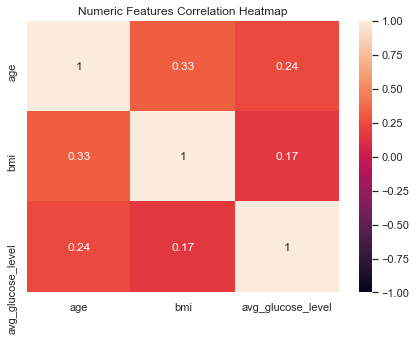

In [619]:
heatmap0 = sns.heatmap(df[['age', 'bmi', 'avg_glucose_level']].corr(), vmin= -1, vmax= 1, annot = True)
heatmap0.set_title('Numeric Features Correlation Heatmap');
plt.show()

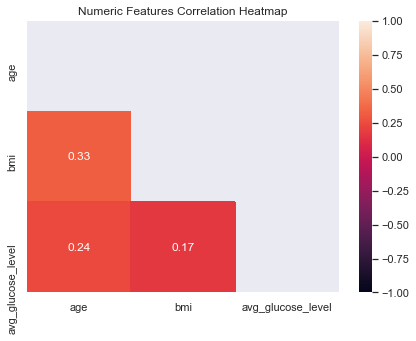

In [621]:
mask = np.triu(np.ones_like(df[['age', 'bmi', 'avg_glucose_level']].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[['age', 'bmi', 'avg_glucose_level']].corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Numeric Features Correlation Heatmap');
plt.show()

We see that the numeric fields have weak correlation with each other.  Let's see the distributions of the Numerical fields - Age, BMI, and Avg_glucose_level:

#### Numerical Fields:

Mean: 43
Median: 45


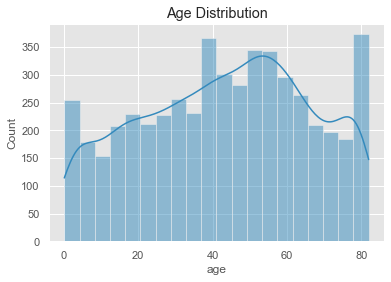

In [465]:
print(f"Mean: {round(df['age'].mean())}")
print(f"Median: {round(df['age'].median())}")
Age_dis = sns.histplot(df['age'], kde = True)
Age_dis.set_title("Age Distribution")
plt.show()
#Age is somewhat normally distributed (with slight left skew)  

Text(0.5, 1.0, 'Estimated PDF of Age')

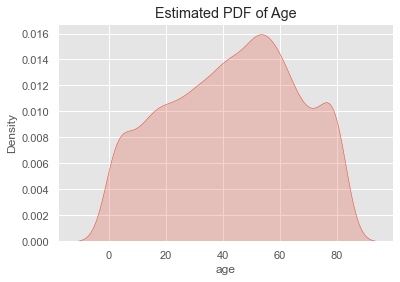

In [466]:
#Age Distribution - Prob dens function 
sns.kdeplot(data = df['age'], shade = True).set_title("Estimated PDF of Age")

Let's see the Age distribution with respect to Stroke:

Text(0.5, 1.0, 'Distribution of Age and Stroke')

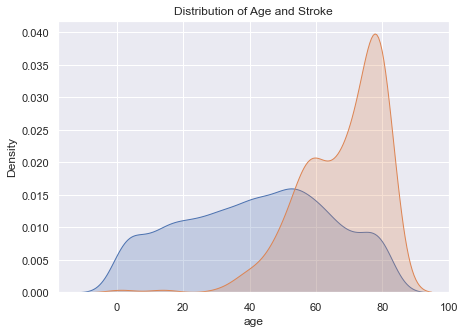

In [625]:
data1 = df[df['stroke']==0]
data2 = df[df['stroke']==1]

sns.kdeplot(data = data1, x = 'age', shade = True)
sns.kdeplot(data = data2, x = 'age', shade = True).set_title("Distribution of Age and Stroke")

Here we can clearly see that the older you get, the higher your chance of experiencing a stroke becomes, especially it gets steep after age 50.  

Let's look at BMI field -  according to the National Institutes of Health (NIH):<br> 
A BMI of less than 18.5 means that a person is underweight.<br> 
A BMI of between 18.5 and 24.9 is ideal.<br> 
A BMI of between 25 and 29.9 is overweight.<br> 
A BMI over 30 indicates obesity.<br> 

Mean: 29
Median: 28


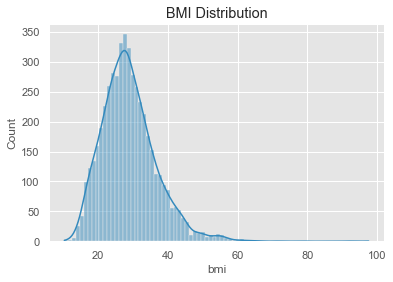

In [468]:
print(f"Mean: {round(df['bmi'].mean())}")
print(f"Median: {round(df['bmi'].median())}")
BMI_dis = sns.histplot(df['bmi'], kde = True)
BMI_dis.set_title("BMI Distribution")
plt.show()

BMI is somewhat normally distributed with slight right-skew and the mean is 29 - meaning that most people in this set is overweight and borderline obese.  
Let's look at the BMI probability density with respect to Stroke:

Text(0.5, 1.0, 'Distribution of Body Mass Index and Stroke')

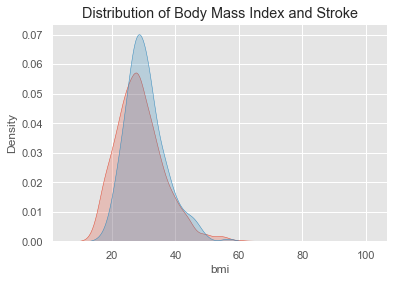

In [469]:
sns.kdeplot(data = data1, x = 'bmi', shade = True)
sns.kdeplot(data = data2, x = 'bmi', shade = True).set_title("Distribution of Body Mass Index and Stroke")

Interestingly from the plot above, this is contrary to my assumption of associating higher BMI with high body fat % in general leading me to believe that there would be strong positive correlation between BMI and stroke. However, from the plot we can see that high BMI doesn't necessarily have a drastic effect or a different trend than that of non-stroke people, but just a slight increase in the bmi range of overweight and obese (beyond the >25 bmi). 

Let's look at the Average Glucose Level field - according to experts here are some range of blood sugar: <br> 
A amount less than 50mg/dL means blood sugar is critically low and requires immediate treatment.<br> 
51-70 means blood sugar is below normal levels and requires treatment.<br> 
71-90 means blood sugar should be monitored and treated as necessary. <br> 
90-180 means Healthy range.<br> 
180-250 means above normal levels. <br>
Higher than 250 means very high and requires immediate treatment

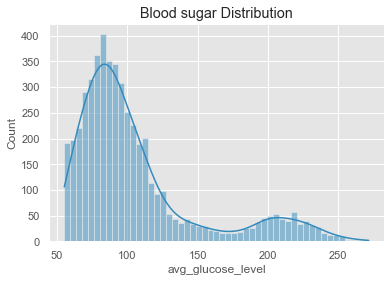

In [470]:
Glucose_dis = sns.histplot(df['avg_glucose_level'], kde = True)
Glucose_dis.set_title("Blood sugar Distribution")
plt.show()

Blood-sugar distribution is highly right-skewed and the people who have higher than 180mg/dL blood sugar makes up 11 % of total dataset:

In [471]:
df[df['avg_glucose_level'] >= 180].shape[0]/len(df)*100

11.411235075357212

We can see from the distribution that most people in the set are in healthy range of blood sugar with the exception of some people who have higher than 180 mg/dL having above normal levels of blood sugar making up 11% of the records. 
Let's see the Blood sugar distribution with respect to Stroke:

Text(0.5, 1.0, 'Distribution of Blood sugar and Stroke')

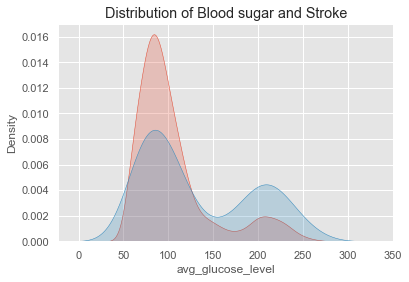

In [472]:
sns.kdeplot(data = data1, x = 'avg_glucose_level', shade = True)
sns.kdeplot(data = data2, x = 'avg_glucose_level', shade = True).set_title("Distribution of Blood sugar and Stroke")

Those 11% of people who have higher than 180mg/DL account for 32% of all strokes.  

In [473]:
high_glucose = df[df['avg_glucose_level'] >= 180]
high_glucose[high_glucose['stroke']==1].shape[0]/len(df[df['stroke']==1])*100

31.72690763052209

From the Blood Sugar and Stroke Density Distribution above, we don't see a clear trend between a high avg_glucose_level and the risk of stroke.  However, an explanation for the rise in stroke probability density among the higher than 180mg/dL glucose level group could be attributed to the presence of diabetes.  According to the American Diabetes Association, a reading between 180-200mg/dL is categorized as prediabetic and a reading of more than 200mg/dL belongs to diabetic category.  Since if you have diabetes, your chances of having a stroke are 1.5 times higher, this could be a very probable explanation for the 2nd bellcurve of stroke in the graph.  

Text(0.5, 1.0, 'Age vs. BMI')

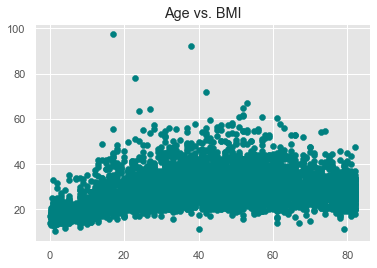

In [474]:
plt.scatter(df['age'], df['bmi'], color='teal')
plt.title('Age vs. BMI')

There's some correlation between age and BMI which is intuitive. Past 50 years of age though, the BMI trend does seem to go down and this may be due to our bodies starting to get old and smaller in frame.  

Text(0.5, 1.0, 'Age vs. Blood sugar')

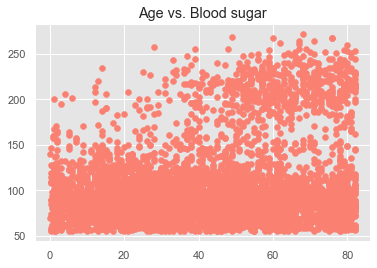

In [475]:
plt.scatter(df['age'], df['avg_glucose_level'], color='salmon')
plt.title('Age vs. Blood sugar')

As for Age vs. Blood sugar, there seems to be a strange presence of correlation that seems to support the diabetes condition. 

##### Categorical fields analysis:

In order to explore the categorical fields - since many of them are binary fields with yes or no answer, I am using bar chart to first show the attribute amount/count and then on a second graph, show the stroke percentage within each attribute to observe any trend. 

Since this process will be repeated for each categorical field, functions are created to reduce code redundancy:

In [476]:
def bar_chart(attribute):
    return df.groupby([attribute, 'stroke'])['age'].count().unstack().plot.bar(stacked=True, figsize=(4,4), width=0.5)

def stroke_pct(attribute):
    stroke = df.groupby([attribute, 'stroke'])['age'].count()
    total = df.groupby([attribute])['age'].count()
    stroke_pct = stroke/total * 100 
    stroke_pct = stroke_pct.unstack() 
    return stroke_pct.plot.bar(stacked=True, figsize=(4,4), width=0.5)
    

Gender:

Text(0.5, 1.0, 'Stroke % in Gender')

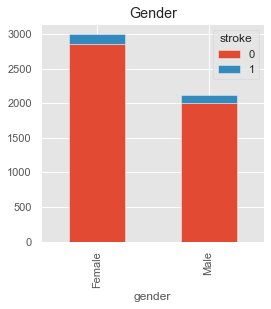

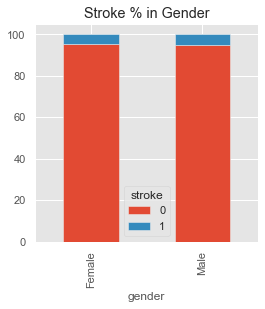

In [477]:
bar_chart('gender').set_title("Gender")
stroke_pct('gender').set_title("Stroke % in Gender")

Even though our dataset had more females than males, the stroke amount is about the same in both gender.  

Hypertension:

Text(0.5, 1.0, 'Stroke % in Hypertension')

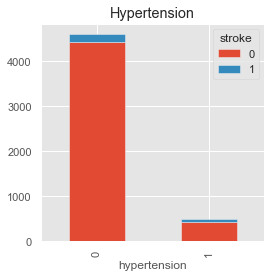

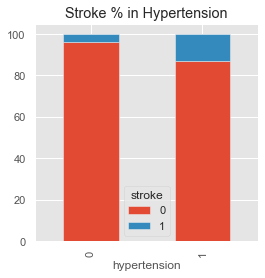

In [478]:
bar_chart('hypertension').set_title("Hypertension")
stroke_pct('hypertension').set_title("Stroke % in Hypertension")

Here we do see greater proportion of strokes in people who have hypertension versus people who don't have hypertension.  

Heart Disease:

Text(0.5, 1.0, 'Stroke % in Heart disease')

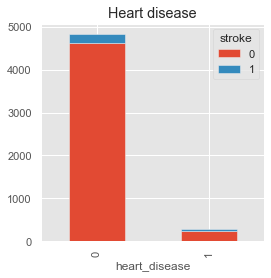

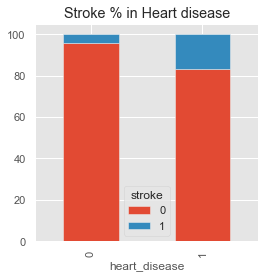

In [479]:
bar_chart('heart_disease').set_title("Heart disease")
stroke_pct('heart_disease').set_title("Stroke % in Heart disease")

As with Hypertension, we also see higher proportion of strokes in people who have Heart disease than people who don't.  While this seems like a correlation between Hypertension/Heart disease with Stroke, we will see that this isn't but rather due to a higher correlation between Hypertension/Heart disease and Age: 

In [480]:
df.groupby(['hypertension'])[['age']].mean()  # notice the mean age is higher in people who have hypertension  

,age
hypertension,
0,41.176318
1,62.244980


In [481]:
df.groupby(['heart_disease'])[['age']].mean()  # notice the mean age is higher in people who have heart disease  

,age
heart_disease,
0,41.804676
1,68.188406


Ever married:

Text(0.5, 1.0, 'Stroke % in Ever Married')

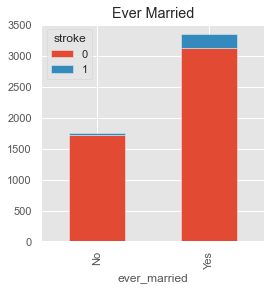

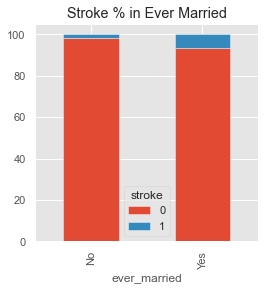

In [482]:
bar_chart('ever_married').set_title("Ever Married")
stroke_pct('ever_married').set_title("Stroke % in Ever Married")

Same case here - although it looks like stroke proportion is higher in ever being married, if we look at the age of each group, we will see that the people who answered no to ever being married are young in comparison:

In [483]:
df.groupby(['ever_married'])[['age']].agg(['count', 'mean']) # note the mean age of people who have been married to be 54

age           
             count       mean
ever_married                 
No            1756  22.011959
Yes           3353  54.342082

Work type:

Text(0.5, 1.0, 'Stroke % in Work type')

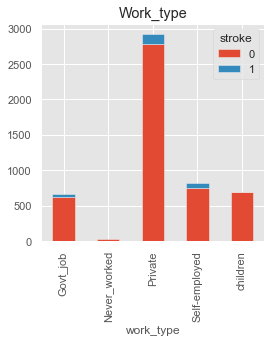

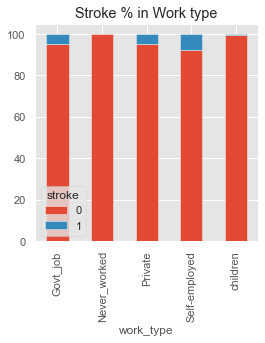

In [484]:
bar_chart('work_type').set_title("Work_type")
stroke_pct('work_type').set_title("Stroke % in Work type")

Is it because people who have never worked or are children less stressed out and therefore don't experience stroke? 
Well, not really because it goes back to age: 
Note that the age of the work type groups that experienced the highest or higher proportion of strokes are well into their middle age whereas never_worked type is of student age group and the children - really young. 

In [485]:
df.groupby(['work_type'])[['age']].agg(['count', 'mean']) 

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2924  45.510602
Self-employed   819  60.201465
children        687   6.841339

Smoking Status:

Text(0.5, 1.0, 'Stroke % among Smoking status')

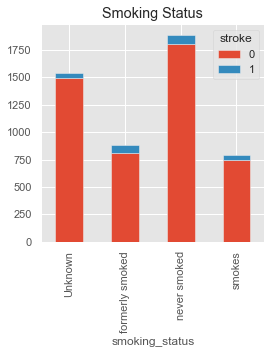

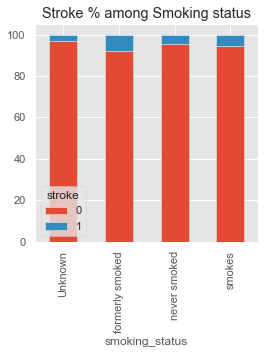

In [486]:
bar_chart('smoking_status').set_title("Smoking Status")
stroke_pct('smoking_status').set_title("Stroke % among Smoking status")

In [487]:
df.groupby(['smoking_status', 'stroke'])[['age']].agg(['count', 'mean'])

age           
                       count       mean
smoking_status  stroke                 
Unknown         0       1497  29.112011
                1         47  65.836596
formerly smoked 0        814  53.787469
                1         70  68.628571
never smoked    0       1802  45.567703
                1         90  70.311111
smokes          0        747  46.212851
                1         42  62.809524

There isn't a clear trend with respect to smoking status.  The only definite trend seems to be age.  Stroke among ALL of the smoking status is tied to ages older than 60.   

Residence type:

Text(0.5, 1.0, 'Stroke % in Residence type')

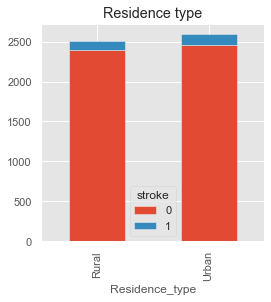

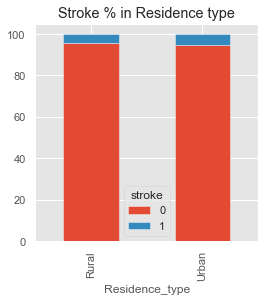

In [488]:
bar_chart('Residence_type').set_title("Residence type")
stroke_pct('Residence_type').set_title("Stroke % in Residence type")

Seems like there is no correlation between type of residence and risk of stroke.  

EDA Insight & Learnings:

1) Age is a strong driving factor for the risk of stroke. 
2) Contrary to my assumption, BMI was not highly correlated to risk of Stroke. This came as a surprise as BMI is used to diagnose obesity which is often linked to other risks like heart disease and stroke.  
3) Blood sugar was not correlated to stroke risk however, diabetes is a risk for stroke because it raises the risk by 1.5 times if your avg_glucose_level is greater than 200mg/dL reaching the diabetic category and we saw that reflected in this dataset.   <br>
4) Sometimes what seems to be a correlation on the surface isn't. For example, attributes like Heart disease, hypertension, ever_married and smoking_status all upon further analysis, pointed to age.  
5) When dealing with null values, it's good to check what impact they may have in your target feature before removing them.  We found that 20% of the missing BMI values made up 1/6th (16%) of all strokes. Data cleaning and pre-processing is a critical step.
6) As a continuation of my project, I built a predictive classification model using Machine Learning.   

##### Modeling
Before modeling, first we check logistic regression assumptions of: <br>
The logistic regression assumes that there is minimal or no multicollinearity among the independent variables.(The Correlation Heatmap showed no collinearity among the Numeric Features) <br>
The Logistic regression assumes that the independent variables are linearly related to the log of odds. (Will check) <br>
The logistic regression usually requires a large sample size to predict properly. (will Upsample the stroke data using SMOTE technique) <br> 
The Logistic regression which has two classes assumes that the dependent variable is binary (already binary) <br>
The Logistic regression assumes the observations to be independent of each other. (independent as far as the source goes - no duplicate subjects)

In [489]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


Text(0.5, 1.0, 'Age Log Odds Linear Plot')

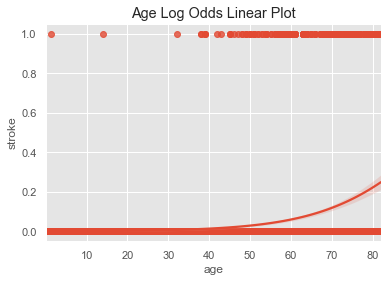

In [490]:
# Checking for Assumption of Continuous independent variables being Linearly Related to the Log Odds by to plotting the
# x var to look for an S-shaped curve. Sometimes the S-shape will not be obvious. 
# The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.
import statsmodels.formula.api as smf
sns.regplot(x= 'age', y= 'stroke', data= df, logistic= True).set_title("Age Log Odds Linear Plot")
# age.figure.savefig("age log lin.png")

Text(0.5, 1.0, 'BMI Log Odds Linear Plot')

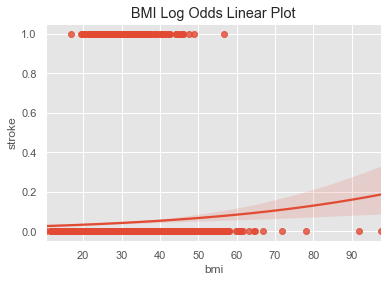

In [491]:
sns.regplot(x= 'bmi', y= 'stroke', data= df, logistic= True).set_title("BMI Log Odds Linear Plot")
# bmi.figure.savefig("bmi log lin.png")

Text(0.5, 1.0, 'Blood Sugar Log Odds Linear Plot')

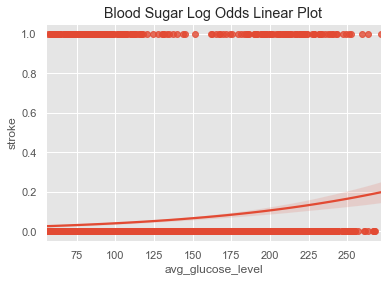

In [492]:
sns.regplot(x= 'avg_glucose_level', y= 'stroke', data= df, logistic= True).set_title("Blood Sugar Log Odds Linear Plot")
# avg_glucose_level.figure.savefig("Blood Sugar log lin.png")

Text(0.5, 1.0, 'Age Box Plot')

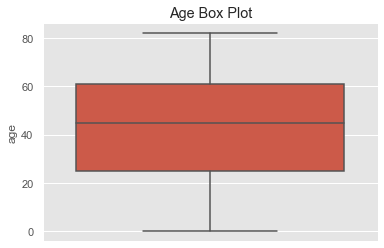

In [493]:
age_box = sns.boxplot(y= 'age', data= df).set_title("Age Box Plot")
# age_box.figure.savefig("Age Box Plot.png")
age_box

Text(0.5, 1.0, 'BMI Box Plot')

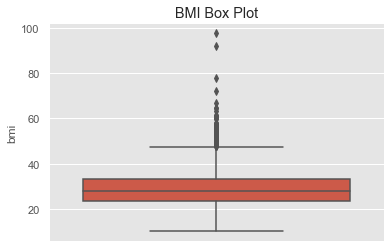

In [494]:
bmi_box = sns.boxplot(y= 'bmi', data= df).set_title("BMI Box Plot")
# bmi_box.figure.savefig("BMI Box Plot.png")
bmi_box

Text(0.5, 1.0, 'Blood Sugar Box Plot')

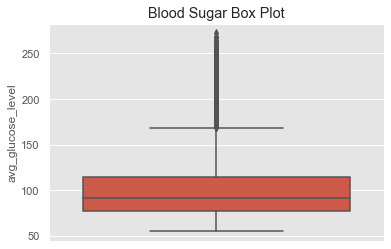

In [495]:
glucose_box = sns.boxplot(y= 'avg_glucose_level', data= df).set_title("Blood Sugar Box Plot")
# glucose_box.figure.savefig("Blood Sugar Box Plot.png")
glucose_box

Now that we know that the assumptions of logistic regressions are there, we can start the modeling process by first feature engineering and label encoding:

In [496]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [497]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
df['gender']= label.fit_transform(df['gender']) # Female 0, Male 1
print(df['gender'].unique()) 

[0 1]


In [498]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,1,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [499]:
df['ever_married']= label.fit_transform(df['ever_married']) # Yes -> 1 
print(df['ever_married'].unique())
# or we could have used df['ever_married']=np.where(df['ever_married']=='yes', 1, 0) 

[0 1]


In [500]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.08,0,0,0,children,Urban,139.67,14.1,Unknown,0
1,1,0.08,0,0,0,children,Rural,70.33,16.9,Unknown,0


In [501]:
df['Residence_type']= label.fit_transform(df['Residence_type'])  # Urban -> 1 
print(df['Residence_type'].unique())

[1 0]


In [502]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.08,0,0,0,children,1,139.67,14.1,Unknown,0
1,1,0.08,0,0,0,children,0,70.33,16.9,Unknown,0


In [503]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [504]:
# Ordinal encoding of the Smoking_status feature:
df['smoking_status'] = df['smoking_status'].map({'never smoked': 1,
                                  'Unknown': 2,
                                  'formerly smoked': 3,
                                  'smokes': 4})

In [505]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.08,0,0,0,children,1,139.67,14.1,2,0
1,1,0.08,0,0,0,children,0,70.33,16.9,2,0
2,1,0.16,0,0,0,children,1,114.71,17.4,2,0
3,1,0.16,0,0,0,children,0,69.79,13.0,2,0
4,1,0.16,0,0,0,children,1,109.52,13.9,2,0


In [506]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [507]:
df[df['work_type'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [508]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [509]:
# We fill in the 3.9% null values of bmi with the mean values 
df['bmi'].fillna(bmi_mean, inplace = True) 
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,82.0,0,0,0,Private,0,96.98,21.5,1,0
5106,1,82.0,0,0,1,Private,1,217.57,33.5,3,0
5107,0,82.0,0,0,1,Self-employed,1,113.45,30.3,1,0
5108,0,82.0,0,0,1,Self-employed,0,211.58,36.9,1,0
5109,1,82.0,1,0,1,Self-employed,0,71.97,28.3,1,0


In [510]:
df.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [511]:
df.groupby(['work_type', 'stroke'])[['gender']].count()

gender
work_type     stroke        
Govt_job      0          624
              1           33
Never_worked  0           22
Private       0         2775
              1          149
Self-employed 0          754
              1           65
children      0          685
              1            2

In [512]:
(df.loc[df['work_type']=='Govt_job'].groupby('stroke').gender.count()[1])/(df.loc[df['work_type']=='Govt_job'].groupby('stroke').gender.count()[0] + df.loc[df['work_type']=='Govt_job'].groupby('stroke').gender.count()[1])*100

5.0228310502283104

In [513]:
(df.loc[df['work_type']=='Private'].groupby('stroke').gender.count()[1])/(df.loc[df['work_type']=='Private'].groupby('stroke').gender.count()[0] + df.loc[df['work_type']=='Private'].groupby('stroke').gender.count()[1])*100

5.095759233926129

In [514]:
(df.loc[df['work_type']=='Self-employed'].groupby('stroke').gender.count()[1])/(df.loc[df['work_type']=='Self-employed'].groupby('stroke').gender.count()[0] + df.loc[df['work_type']=='Self-employed'].groupby('stroke').gender.count()[1])*100

7.936507936507936

In [515]:
(df.loc[df['work_type']=='children'].groupby('stroke').gender.count()[1])/(df.loc[df['work_type']=='children'].groupby('stroke').gender.count()[0] + df.loc[df['work_type']=='children'].groupby('stroke').gender.count()[1])*100

0.2911208151382824

So the % of stroke within the work_types are in the following incrasing order: <br> Never_worked, children, Govt_job, Private, Self_employed <br> This will be used to ordinally encode them.

In [516]:
df[['work_type']] = df[['work_type']].astype(str)

In [517]:
type(df['work_type'][0])

str

In [518]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [519]:
# Label encoding of the work_type feature:
ordinalencoder= OrdinalEncoder()
df['work_type'] = df['work_type'].map({'Never_worked': 1,
                                  'children': 2,
                                  'Govt_job': 3,
                                  'Private': 4,
                                  'Self-employed': 5})

In [520]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.08,0,0,0,2,1,139.67,14.1,2,0
1,1,0.08,0,0,0,2,0,70.33,16.9,2,0
2,1,0.16,0,0,0,2,1,114.71,17.4,2,0
3,1,0.16,0,0,0,2,0,69.79,13.0,2,0
4,1,0.16,0,0,0,2,1,109.52,13.9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,82.00,0,0,0,4,0,96.98,21.5,1,0
5106,1,82.00,0,0,1,4,1,217.57,33.5,3,0
5107,0,82.00,0,0,1,5,1,113.45,30.3,1,0
5108,0,82.00,0,0,1,5,0,211.58,36.9,1,0


Feature Selection - chi square test 

In [521]:
target = df.stroke
features = df.drop(['stroke'], axis=1) 

In [522]:
# Chi-square test for feature selection: 
from sklearn.feature_selection import chi2
f_p_values = chi2(features, target)
f_p_values

(array([2.46877154e-01, 3.63397942e+03, 7.54183191e+01, 8.79572959e+01,
        2.05956706e+01, 9.17766427e+00, 5.97112438e-01, 1.71936818e+03,
        1.58826250e+01, 2.62290674e+00]),
 array([6.19282604e-01, 0.00000000e+00, 3.80840141e-18, 6.68829613e-21,
        5.67242496e-06, 2.44986474e-03, 4.39681887e-01, 0.00000000e+00,
        6.73946041e-05, 1.05331331e-01]))

In [523]:
p_values = pd.Series(f_p_values[1])
p_values.index = features.columns
p_values.sort_values() 

age                  0.000000e+00
avg_glucose_level    0.000000e+00
heart_disease        6.688296e-21
hypertension         3.808401e-18
ever_married         5.672425e-06
bmi                  6.739460e-05
work_type            2.449865e-03
smoking_status       1.053313e-01
Residence_type       4.396819e-01
gender               6.192826e-01
dtype: float64

According to the chi-squared test results, the features - gender, Residence_type, and smoking_status - have p-values less than 0.05 indicating that they have an insignificant effect on the log odds of experiencing stroke.  <br> 
<br>
Let's see if binarizing the smoking_status to whether the patient has smoked before or not changes this significance result:

In [524]:
# Make smoking_status into Binary feature indicating having smoked or not to see impact on risk of stroke: 
features['smoking_status'] = (features['smoking_status']==3) | (features['smoking_status']==4) 

In [525]:
# Encode to 0 and 1 
features['smoking_status']= label.fit_transform(features['smoking_status'])
print(features['smoking_status'].unique())

[0 1]


In [526]:
# Re-do the chi-square test after binarizing the smoking_status:
from sklearn.feature_selection import chi2
f_p_values = chi2(features, target)
f_p_values

(array([2.46877154e-01, 3.63397942e+03, 7.54183191e+01, 8.79572959e+01,
        2.05956706e+01, 9.17766427e+00, 5.97112438e-01, 1.71936818e+03,
        1.58826250e+01, 1.19635662e+01]),
 array([6.19282604e-01, 0.00000000e+00, 3.80840141e-18, 6.68829613e-21,
        5.67242496e-06, 2.44986474e-03, 4.39681887e-01, 0.00000000e+00,
        6.73946041e-05, 5.42509374e-04]))

In [527]:
p_values = pd.Series(f_p_values[1])
p_values.index = features.columns
p_values.sort_values() 

age                  0.000000e+00
avg_glucose_level    0.000000e+00
heart_disease        6.688296e-21
hypertension         3.808401e-18
ever_married         5.672425e-06
bmi                  6.739460e-05
smoking_status       5.425094e-04
work_type            2.449865e-03
Residence_type       4.396819e-01
gender               6.192826e-01
dtype: float64

As seen from the chi-square test result above, changing the smoking_status into a binary feature changes the significance (p-value < 0.05) thus we probably could exclude the features - gender & Residence_type - from modeling as they have no significant effect on the target variable(stroke) if we see further evidence.  

Based on EDA analysis, we change the features - age and avg_glucose_level - into binary fields indicating whether the patient is older than 50 years of age and has a blood sugar level higher than 180mg/dL.  

In [528]:
# # Make age into Binary feature since we know that people older than 50 are at high risk: 
# features['age'] = features['age']>50

In [529]:
# # Encode to 0 and 1 
# features['age']= label.fit_transform(features['age'])
# print(features['age'].unique())

In [530]:
features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0.08,0,0,0,2,1,139.67,14.1,0
1,1,0.08,0,0,0,2,0,70.33,16.9,0
2,1,0.16,0,0,0,2,1,114.71,17.4,0
3,1,0.16,0,0,0,2,0,69.79,13.0,0
4,1,0.16,0,0,0,2,1,109.52,13.9,0


In [531]:
# # Make avg_glucose_level into Binary feature since we know that people who have blood sugar >180mg/dL are diabetic and 
# # at high risk for stroke: 
# features['avg_glucose_level'] = features['avg_glucose_level']>180 

In [532]:
# # Encode to 0 and 1 
# features['avg_glucose_level']= label.fit_transform(features['avg_glucose_level'])
# print(features['avg_glucose_level'].unique())

In [533]:
# features.head()

In [534]:
# # Re-do the chi-square test after binarizing the smoking_status:
# from sklearn.feature_selection import chi2
# f_p_values = chi2(features, target)
# f_p_values

In [535]:
# p_values = pd.Series(f_p_values[1])
# p_values.index = features.columns
# p_values.sort_values() 

In [536]:
# # Drop gender & Residence_type features from chi-square test feature selection insignificant p-value results:
# features = features.drop(columns=['gender', 'Residence_type'])
# features.head()

In [537]:
features.shape

(5109, 10)

In [538]:
target.shape

(5109,)

In [539]:
features.bmi.max()

97.6

In [540]:
# # Make the bmi into bins according to the health groups of underweight, ideal, overweight, obese so we can ordinally encode it 
# # to make it a categorical feature.  
# features['bmi'] = pd.cut(x=features['bmi'], bins=[1, 18.4, 24.9, 29.9, 100], labels=['underweight', 'ideal', 'overweight', 'obese'])

In [541]:
# features['bmi'].isnull().sum()

In [542]:
# features.head()

In [543]:
# # Ordinal encoding of the bmi feature:
# features['bmi'] = features['bmi'].map({'underweight': 1,
#                                   'ideal': 2,
#                                   'overweight': 3,
#                                   'obese': 4})

In [544]:
# features.head()

In [545]:
# features.bmi.value_counts()

In [546]:
# # Re-do the chi-square test after binning bmi medically and then ordinally encoding the bmi feature:
# from sklearn.feature_selection import chi2
# f_p_values = chi2(features, target)
# f_p_values

In [547]:
# p_values = pd.Series(f_p_values[1])
# p_values.index = features.columns
# p_values.sort_values() 
# # We see from the result below that after binning, bmi has the least significant effect on the target variable(stroke) compared
# # amongst all the other predictor variables.  

Checking for multicollinearity in the predictor features by VIF:

In [548]:
# VIF to detect multicollinearity among predictors 
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  

vif_data.sort_values(by="VIF")

,feature,VIF
3,heart_disease,1.170809
2,hypertension,1.213922
9,smoking_status,1.611030
0,gender,1.674943
6,Residence_type,1.963453
4,ever_married,5.572395
7,avg_glucose_level,6.411477
1,age,11.773084
8,bmi,14.825857
5,work_type,19.245293


Since work_type, bmi and age have high VIF (>10), I'm gonna drop work_type and recheck the VIF:

In [549]:
features = features.drop(columns=['work_type'])
features.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0.08,0,0,0,1,139.67,14.1,0
1,1,0.08,0,0,0,0,70.33,16.9,0
2,1,0.16,0,0,0,1,114.71,17.4,0
3,1,0.16,0,0,0,0,69.79,13.0,0
4,1,0.16,0,0,0,1,109.52,13.9,0


In [550]:
# Re-run VIF after removing work_type feature:
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  

vif_data.sort_values(by="VIF")

,feature,VIF
3,heart_disease,1.164070
2,hypertension,1.199494
8,smoking_status,1.605948
0,gender,1.667631
5,Residence_type,1.934152
4,ever_married,5.572376
6,avg_glucose_level,6.200796
7,bmi,9.045475
1,age,9.839585


In [551]:
features = features.drop(columns=['bmi'])
features.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status
0,0,0.08,0,0,0,1,139.67,0
1,1,0.08,0,0,0,0,70.33,0
2,1,0.16,0,0,0,1,114.71,0
3,1,0.16,0,0,0,0,69.79,0
4,1,0.16,0,0,0,1,109.52,0


In [552]:
# Re-run VIF after removing bmi feature:
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  

vif_data.sort_values(by="VIF")

,feature,VIF
3,heart_disease,1.136996
2,hypertension,1.197642
7,smoking_status,1.595537
0,gender,1.622286
5,Residence_type,1.842249
6,avg_glucose_level,4.449252
4,ever_married,5.478385
1,age,8.885950


In [553]:
# Re-do the chi-square test for feature selection after removing 'work_stype' due to high VIF result(multicollinearity):
from sklearn.feature_selection import chi2
f_p_values = chi2(features, target)
f_p_values

(array([2.46877154e-01, 3.63397942e+03, 7.54183191e+01, 8.79572959e+01,
        2.05956706e+01, 5.97112438e-01, 1.71936818e+03, 1.19635662e+01]),
 array([6.19282604e-01, 0.00000000e+00, 3.80840141e-18, 6.68829613e-21,
        5.67242496e-06, 4.39681887e-01, 0.00000000e+00, 5.42509374e-04]))

In [554]:
p_values = pd.Series(f_p_values[1])
p_values.index = features.columns
p_values.sort_values() # the p-value of each predictor doesn't change as features are removed

age                  0.000000e+00
avg_glucose_level    0.000000e+00
heart_disease        6.688296e-21
hypertension         3.808401e-18
ever_married         5.672425e-06
smoking_status       5.425094e-04
Residence_type       4.396819e-01
gender               6.192826e-01
dtype: float64

In [555]:
features.shape

(5109, 8)

In [556]:
target.shape

(5109,)

Modeling Plan: <br> 
1) Initial Logistic regression run with label-encoded features along with the numeric features and grid search to find best parameters with penalty 
2) Ridge/Lasso regression to see if any of the coefficients would be shrunk to 0 <br> 
3) Random Forest as a non-linear descriptive modeling

We split the data into train and test before Upsampling using SMOTE to have representative proportion in both the train and test datasets. 

In [557]:
y = target 
X = features
X.shape
# y = df.stroke
# X = df.drop(['stroke'], axis=1) 
# X.shape

(5109, 8)

In [558]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [559]:
X_train.shape

(3576, 8)

In [560]:
X_test.shape

(1533, 8)

In [561]:
y_train.value_counts()

0    3402
1     174
Name: stroke, dtype: int64

In [562]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [563]:
resamplingDataPrep(X_train, y_train, 'stroke_')

majority_class: 3402
minority_class: 174


(      gender   age  hypertension  heart_disease  ever_married  Residence_type  \
 583        0  12.0             0              0             0               0   
 357        0   7.0             0              0             0               1   
 2107       0  39.0             0              0             1               0   
 2774       1  48.0             0              0             1               0   
 3325       0  54.0             0              0             1               1   
 ...      ...   ...           ...            ...           ...             ...   
 4407       1  71.0             0              0             1               1   
 4484       1  72.0             0              1             1               1   
 2854       0  49.0             0              0             1               0   
 533        0  11.0             0              0             0               0   
 4231       0  67.0             1              0             1               1   
 
       avg_glu

In [564]:
!pip install delayed 
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

def upsample_SMOTE(X_train, y_train, ratio=.25):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, y_train

Requirement already up-to-date: imbalanced-learn in c:\users\oyb50\anaconda3\lib\site-packages (0.8.0)


In [565]:
X_train, y_train = upsample_SMOTE(X_train, y_train)

In [566]:
X_train.shape

(4252, 8)

In [567]:
y_train.value_counts()

0    3402
1     850
Name: stroke, dtype: int64

In [568]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status
0,0,12.0,0,0,0,0,116.04,0
1,0,7.0,0,0,0,1,156.82,0
2,1,57.0,0,0,1,1,86.30,0
3,0,39.0,0,0,1,0,97.89,0
4,1,48.0,0,0,1,0,216.88,1


In [569]:
api_modeling =pd.concat([X_train, y_train], axis=1)
api_modeling.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,12.0,0,0,0,0,116.04,0,0
1,0,7.0,0,0,0,1,156.82,0,0
2,1,57.0,0,0,1,1,86.30,0,1
3,0,39.0,0,0,1,0,97.89,0,0
4,1,48.0,0,0,1,0,216.88,1,0


In [570]:
import statsmodels.formula.api as smf
model= smf.logit(formula="stroke~ gender + age + hypertension + heart_disease + ever_married + Residence_type + avg_glucose_level + smoking_status", data= api_modeling).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.342761
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4252
Model:                          Logit   Df Residuals:                     4243
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                  0.3148
Time:                        21:31:24   Log-Likelihood:                -1457.4
converged:                       True   LL-Null:                       -2127.2
Covariance Type:            nonrobust   LLR p-value:                6.906e-284
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.2240      0.218    -23.963      0.000      -5.651      -4.797
gender               -0.8210      0.107     -7.676      0.000      -1.031      -0.611
age                   0.0792      0.003     24.034      0.000       0.073       0.086
hypertension         -0.4906      0.140     -3.497      0.000      -0.765      -0.216
heart_disease        -0.8072      0.196     -4.114      0.000      -1.192      -0.423
ever_married         -0.6510      0.136     -4.797      0.000      -0.917      -0.385
Residence_type       -0.8882      0.097     -9.137      0.000      -1.079      -0.698
avg_glucose_level     0.0064      0.001      7.545      0.000       0.005       0.008
smoking_status       -0.5261      0.103     -5.100      0.000      -0.728      -0.324
=====================================================================================
"""

In [571]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.005386,6.813107e-127,0.003513,0.008257
gender,0.439984,1.643295e-14,0.356773,0.542604
age,1.082466,1.218076e-127,1.075493,1.089483
hypertension,0.612286,4.701785e-04,0.465109,0.806034
heart_disease,0.446116,3.890479e-05,0.303694,0.655330
ever_married,0.521532,1.613038e-06,0.399723,0.680459
Residence_type,0.411399,6.444272e-20,0.340029,0.497750
avg_glucose_level,1.006461,4.535640e-14,1.004779,1.008147
smoking_status,0.590900,3.396127e-07,0.482731,0.723306


Interpreting the API logistic regression model summary, first of all the LLR p-value is < 0.05(1.768e-143) which allows us to look at the rest of the results.  Bmi has p-value > 0.05 and therefore have insignificant effect on the log odds of risk of stroke.  Therefore we will exclude them from modeling.

In [572]:
# api_modeling = api_modeling.drop(columns=['bmi'])
# api_modeling.head()

In [573]:
# # Rerun the api statsmodel to see if the performance worsens: 
# model= smf.logit(formula="stroke~ gender + age + hypertension + heart_disease + ever_married + Residence_type + avg_glucose_level + smoking_status", data= api_modeling).fit()
# model.summary()

In [574]:
# model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
# model_odds['z-value']= model.pvalues
# model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
# model_odds

In [575]:
# X_train = X_train.drop(columns=['bmi'])
# X_test = X_test.drop(columns=['bmi'])

In [576]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status
0,0,12.0,0,0,0,0,116.04,0
1,0,7.0,0,0,0,1,156.82,0
2,1,57.0,0,0,1,1,86.30,0
3,0,39.0,0,0,1,0,97.89,0
4,1,48.0,0,0,1,0,216.88,1


In [577]:
X_train.shape

(4252, 8)

In [578]:
#Initial LogisticRegression with default values - before any Gridsearch 
logit = LogisticRegression(solver='liblinear', max_iter=100, random_state=1) #{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
clf_1 = logit.fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf_1.predict(X_train)

print(f"Train: {clf_1.score(X_train,y_train)}")
print(f"Test: {clf_1.score(X_test, y_test)}")

Train: 0.8518344308560677
Test: 0.8988910632746249


In [579]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [580]:
param_grid = [
    {'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20)
#      'solver': ['lbfgs'] # 'newton-cg', , 'liblinear', 'sag', 'saga']
    }
]

In [581]:
np.logspace(-4,4,20) 

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [582]:
# Utilize GridSearch to find best recommended parameters: 
from sklearn.model_selection import GridSearchCV, KFold

clf = GridSearchCV(logit, param_grid = param_grid, cv = KFold(shuffle=True, random_state=1), verbose=2, n_jobs=-1, scoring='roc_auc')

In [583]:
best_clf= clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [584]:
# Best Parameters
(best_clf.best_params_)

{'C': 4.281332398719396, 'penalty': 'l2'}

In [585]:
best_clf.best_score_

0.8662034896374857

In [586]:
# Best GridSearch/CV score on train - same as the auc_train
best_clf.score(X_train,y_train)

0.8678109762423487

In [587]:
best_clf.score(X_test, y_test) 

0.812217649748514

In [588]:
# Utilize Ridge regression as chosen by the GridSearch best parameters with the recommended C-value (penalty):
logit = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2', random_state=1, C=4.281332398719396)

clf_ridge = logit.fit(X_train, y_train)
 
# Predict on training set
pred_y_ridge = clf_ridge.predict(X_train)

print(clf_ridge.score(X_train, y_train))
print(clf_ridge.score(X_test, y_test))  

0.8515992474129821
0.8975864318330071


In [589]:
clf_ridge.get_params()

{'C': 4.281332398719396,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [590]:
clf_ridge.coef_

array([[-0.82286483,  0.07845626, -0.48265234, -0.79170311, -0.65541282,
        -0.88922086,  0.00634518, -0.52622126]])

In [591]:
display = pd.DataFrame(clf_ridge.coef_,
                   columns=X_train.columns)
display = display.T
display.columns = ["coef"]
display=display.reset_index()
display = display.rename(columns={"index": "Features"})
keep=display[display["coef"]!=0].sort_values(by='coef', ascending=False)
keep

,Features,coef
1,age,0.078456
6,avg_glucose_level,0.006345
2,hypertension,-0.482652
7,smoking_status,-0.526221
4,ever_married,-0.655413
3,heart_disease,-0.791703
0,gender,-0.822865
5,Residence_type,-0.889221


In [592]:
# Since the result is in log odds above, we take the exponential for interpretability:
display.coef = np.exp(display.coef)
display = display[display["coef"]!=0].sort_values(by='coef', ascending=False)
display

,Features,coef
1,age,1.081616
6,avg_glucose_level,1.006365
2,hypertension,0.617144
7,smoking_status,0.590833
4,ever_married,0.519228
3,heart_disease,0.453073
0,gender,0.439172
5,Residence_type,0.410976


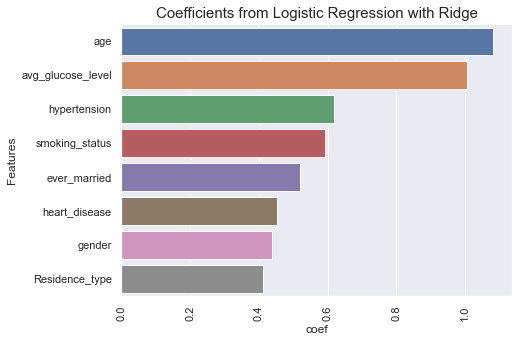

In [626]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(y='Features', x='coef', data=display)
plt.title('Coefficients from Logistic Regression with Ridge', size =15) 
plt.xticks(rotation = 90)
plt.show()


In [594]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status
299,0,5.0,0,0,0,0,92.00,0
3200,0,53.0,0,0,1,1,84.85,0
2461,1,44.0,0,0,1,0,74.91,0
1377,0,27.0,0,0,1,1,88.97,0
2856,1,49.0,0,0,1,0,79.64,1


In [595]:
X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
smoking_status       0
dtype: int64

In [596]:
X_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
smoking_status       0
dtype: int64

In [597]:
y_true.sum()

75

In [598]:
y_pred.sum()

69

Since there seems to be some underfitting (train score being lower than test accuracy score) due to perhaps a non-linear dynamic in the data, I will use Random Forest to capture those nuances:

In [599]:
param_grid= {
    'criterion': ['gini'],
    'n_estimators': [100, 200, 300],
    'max_depth': [7, 10, 13], # 2 to the power of 12 = 4096 obs. We have 2580 obs. so we chose range of (2,12)
#     'max_features': [6,8,10],
    'min_samples_leaf': [4,6,8]
}

In [600]:
from sklearn.ensemble import RandomForestClassifier 
rf_Model = RandomForestClassifier(random_state=1)  

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1, scoring='roc_auc')

In [601]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [7, 10, 13],
                                        'min_samples_leaf': [4, 6, 8],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [602]:
rf_RandomGrid.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 4,
 'max_depth': 13,
 'criterion': 'gini'}

In [603]:
rf_RandomGrid.best_score_

0.9237227865907848

In [604]:
print(rf_RandomGrid.score(X_train, y_train))
print(rf_RandomGrid.score(X_test, y_test))

# with ever_married:
# 0.97909050039769
# 0.8121216278006401

0.97909050039769
0.8121216278006401


In [628]:
rf_clf = RandomForestClassifier(random_state=1, max_depth=13, n_estimators=300, min_samples_leaf=4)
rf_clf.fit(X_train, y_train) 
y_rf_clf_pred = rf_clf.predict(X_train)

print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.9322671683913453
0.913894324853229


In [605]:
# Feature Importance
tree_final2 = rf_RandomGrid.best_estimator_
feature_importance2 = list(zip(X_train.columns, tree_final2.feature_importances_))
sorted(feature_importance2, key=lambda imp: imp[1], reverse=True)

[('age', 0.5002585940087857),
 ('avg_glucose_level', 0.3088512154227943),
 ('Residence_type', 0.0482624315095358),
 ('gender', 0.0450505704820911),
 ('ever_married', 0.0370854632622214),
 ('smoking_status', 0.0303965188559204),
 ('hypertension', 0.017562469056258623),
 ('heart_disease', 0.012532737402392672)]

<BarContainer object of 8 artists>

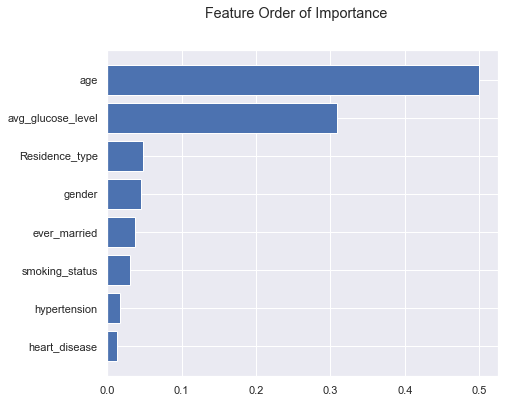

In [633]:
features, importance = zip(*sorted(feature_importance2, key=lambda imp: imp[1], reverse=False))
plt.figure(figsize=(7,6)).suptitle('Feature Order of Importance')
plt.barh(features, importance)

Conclusion:<br>
From the two types of models, the linear model of Logistic Regression with Ridge performed best with a train accuracy score of 85.16% and a test accuracy score of 89.76% as well as roc_auc train score of 86.78% and roc_auc test score of 81.22%.  
From both models, we saw that age and average glucose level were the most important predictors of stroke respectively, both accounting for more than 80% of the variance in the risk of stroke.  

From utilizing the api formula method from statsmodels, we can interpret the following:
- for every year a person gets older, the odds of experiencing a stroke increases by a factor of 1.08 
- for every one unit (mg/dL) increase in a person's average glucose level, the odds of experiencing a stroke increases by a factor of 1.01
- for people who have hypertension, the odds of experiencing stroke increases by a factor of 0.61 on average  
- for people who smoke or have smoked, the odds of experiencing stroke increases by a factor of 0.59 on average
- for people who have been married, the odds of experiencing stroke increases by a factor of 0.52 on average
- for people who have heart disease, the odds of experiencing stroke increases by a factor of 0.45 on average  
- for men, the odds of experiencing stroke increases by a factor of 0.44 on average compared to women 
- for people who live in an urban setting, the odds of experiencing stroke increases by a factor of 0.41 on average